In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# Конфигурация
alpha = 0.1 # Скорость обучения
gamma = 0.9  # Коэффициент уменьшения
epsilon = 0.05 # Вероятность исследования
num_games = 10000  # Количество игр, в которые нужно сыграть
board_size = 3  # Размер сетки

In [6]:
# Инициализация таблицы Q
Q_table = {}

In [8]:
def initialize_board():
    """Создать пустую сетку."""
    return np.zeros((board_size, board_size))

In [24]:
def get_state(board):
    """Преобразует игровое поле в неизменяемое состояние (кортеж) для таблицы Q."""
    return tuple(board.flatten())

In [26]:
def available_moves(state):
    """Возвращает список доступных ходов, если состояние передано как кортеж."""
    board = np.array(state).reshape(board_size, board_size)
    return [(i, j) for i in range(board_size) for j in range(board_size) if board[i, j] == 0]

In [28]:
def check_winner(board):
    """Проверяет, есть ли победитель или ничья."""
    for i in range(board_size):
        if abs(sum(board[i, :])) == board_size:  # Линии
            return np.sign(sum(board[i, :]))
        if abs(sum(board[:, i])) == board_size:  # Столбы
            return np.sign(sum(board[:, i]))
    if abs(sum([board[i, i] for i in range(board_size)])) == board_size:  # Главная диагональ
        return np.sign(sum([board[i, i] for i in range(board_size)]))
    if abs(sum([board[i, board_size - i - 1] for i in range(board_size)])) == board_size:  # Вторичная диагональ
        return np.sign(sum([board[i, board_size - i - 1] for i in range(board_size)]))
    if not available_moves(board):  # Нет доступных ходов
        return 0  # Match nul # Ничья
    return None  # Еще не закончено

In [30]:
def choose_action(state, moves, exploration=True):
    """Выбор действия с помощью epsilon-greedy."""
    if exploration and random.uniform(0, 1) < epsilon:
        return random.choice(moves)
    # В противном случае выберите лучший ход на основе Q
    q_values = {move: Q_table.get((state, move), 0.5) for move in moves}
    return max(q_values, key=q_values.get)

In [32]:
def update_Q(state, action, reward, next_state, done):
    """Обновить таблицу Q."""
    old_value = Q_table.get((state, action), 0.5)
    if done:
        next_max = 0  # Нет следующих состояний, если игра завершена
    else:
        next_max = max([Q_table.get((next_state, a), 0.5) for a in available_moves(next_state)])
    Q_table[(state, action)] = old_value + alpha * (reward + gamma * next_max - old_value)

In [34]:
def play_game():
    """Имитация игры в крестики-нолики."""
    board = initialize_board()
    state = get_state(board)
    done = False
    current_player = 1  # Агент играет первым
    reward = 0

    while not done:
        moves = available_moves(board)
        if current_player == 1:  # Обучающийся агент
            action = choose_action(state, moves)
        else:  # Случайный противник
            action = random.choice(moves)

        # Выполнить движение
        board[action] = current_player
        next_state = get_state(board)
        winner = check_winner(board)

        # Награда и обновление таблицы вопросов
        if winner == 1:  # Агент побеждает
            reward = 1
            done = True
        elif winner == -1:  # Побеждает противник
            reward = 0
            done = True
        elif winner == 0:  # Ничья # Match nul
            reward = 0.5
            done = True
        else:
            reward = 0  # Еще не закончено

        if current_player == 1:  # Обновить Q только для агента
            update_Q(state, action, reward, next_state, done)

        # Перейти к следующему игроку
        state = next_state
        current_player *= -1

    return reward

In [36]:
# Моделирование сторон
rewards = []
for game in range(num_games):
    reward = play_game()
    rewards.append(reward)

In [38]:
# Расчет среднего совокупного вознаграждения
average_rewards = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)

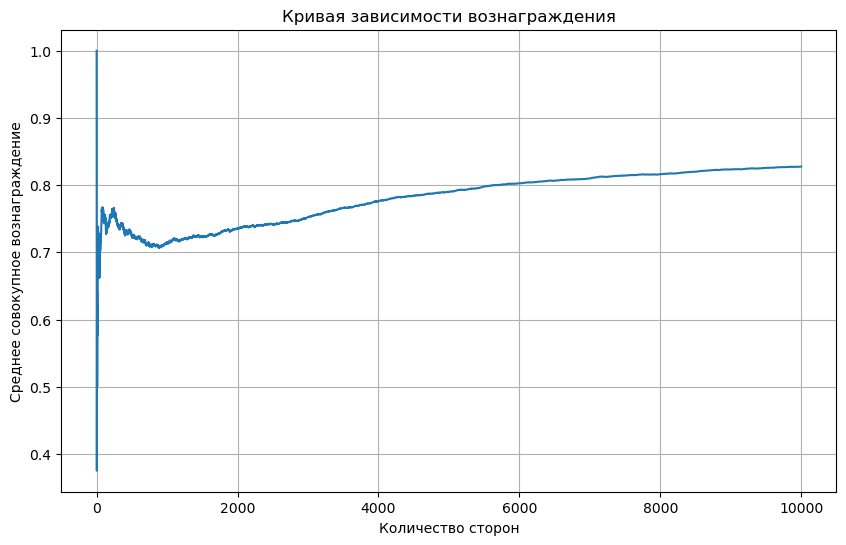

In [42]:
# Построить кривую вознаграждения
plt.figure(figsize=(10, 6))
plt.plot(average_rewards)
plt.title("Кривая зависимости вознаграждения")
plt.xlabel("Количество сторон")
plt.ylabel("Среднее совокупное вознаграждение")
plt.grid()
plt.show()